In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
import os
print("Current Working Directory:", os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")

Current Working Directory: d:\code\Python Programming\Potato Leaf Disease Detection


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [4]:
labels = training_set.class_names
print(labels)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\Anurag Chanda\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 827ms/step - accuracy: 0.3965 - loss: 1.1688 - val_accuracy: 0.6467 - val_loss: 0.7903
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 799ms/step - accuracy: 0.6429 - loss: 0.7597 - val_accuracy: 0.7267 - val_loss: 0.5469
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 806ms/step - accuracy: 0.6894 - loss: 0.6116 - val_accuracy: 0.8033 - val_loss: 0.5249
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 826ms/step - accuracy: 0.7942 - loss: 0.4547 - val_accuracy: 0.8700 - val_loss: 0.3655
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 764ms/step - accuracy: 0.8886 - loss: 0.2904 - val_accuracy: 0.8900 - val_loss: 0.2401
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 770ms/step - accuracy: 0.8907 - loss: 0.2715 - val_accuracy: 0.8633 - val_loss: 0.3447
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 786ms/step - accuracy: 0.9176 - loss: 0.2241 - val_accuracy: 0.9067 - val_loss: 0.1932
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 781ms/step - accuracy: 0.9419 - loss: 0.1446 - val_accu

In [10]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.9891 - loss: 0.0428
Training accuracy: 0.9866666793823242


In [11]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.9271 - loss: 0.1596
Validation accuracy: 0.9366666674613953


In [12]:
cnn.save('Trained_Plant_disease_model.keras')

In [13]:
training_history.history

{'accuracy': [0.48222222924232483,
  0.6544444561004639,
  0.6977777481079102,
  0.8066666722297668,
  0.8888888955116272,
  0.9133333563804626,
  0.9377777576446533,
  0.9399999976158142,
  0.9655555486679077,
  0.9466666579246521],
 'loss': [1.0344816446304321,
  0.7067878842353821,
  0.6018832921981812,
  0.4294835329055786,
  0.2826535105705261,
  0.22936856746673584,
  0.19218768179416656,
  0.15071970224380493,
  0.09287482500076294,
  0.12705035507678986],
 'val_accuracy': [0.6466666460037231,
  0.7266666889190674,
  0.8033333420753479,
  0.8700000047683716,
  0.8899999856948853,
  0.8633333444595337,
  0.9066666960716248,
  0.9366666674613953,
  0.9433333277702332,
  0.9366666674613953],
 'val_loss': [0.7902805805206299,
  0.5469184517860413,
  0.5249276161193848,
  0.3654825985431671,
  0.2401081919670105,
  0.3447462022304535,
  0.193226158618927,
  0.14689449965953827,
  0.16137291491031647,
  0.15433259308338165]}

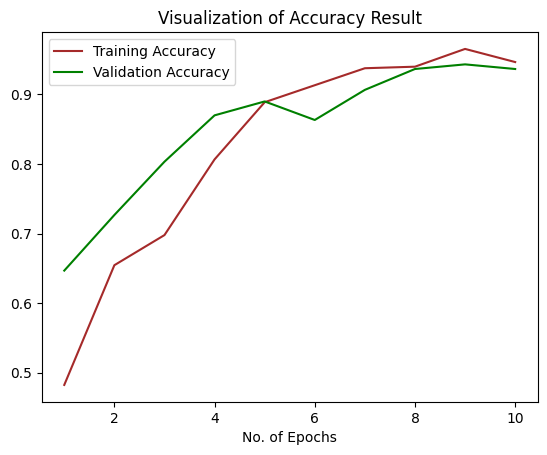

In [14]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()